## 실험 코딩 팁

1. 실험 결과의 신뢰도 높이기
    - 실험의 랜덤성 잡기 
    - 반복 실험하여 통계량을 보고
2. 모듈화
    - 클래스 만들기
3. 효율적인 실험 로깅 - Weight and Bias (WanDB)

## 예제 실험 소개
가우시안 분포에서 샘플링하면서 표본평균이 점점 모평균으로 수렴하는 것을 보는 실험

In [1]:
import numpy as np

# 실험 인자
mu = 10
std = 3
n_trials = 25

# 실험 알고리즘
s = 0
count = 0
history = []
for i in range(n_trials):
    x = np.random.normal(mu, std)
    
    s = s + x
    count = count + 1
    history.append(s / count)
    
print(history[-1])
    

9.160416164841006


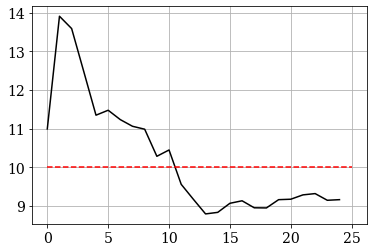

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size']= 14

plt.figure(figsize=(6, 4))
plt.plot(history, 'k-')
plt.hlines(mu, xmin=0, xmax=n_trials, linestyle='dashed', color='red')
plt.grid()
plt.show()

---

## 1. 실험 결과의 신뢰도 올리기

### 1.1 실험의 랜덤성 잡기
- 실험에 랜덤성 (stochasticity)가 있어서 코드를 돌릴 때마다 달라지는 경우가 있다.
- 대학원생 이동진씨는 실험을 하다가 오랜만에 나온 실험 결과가 좋게 나온 것을 보고 노트북을 닫고 바로 교수님 연구실로 달려가 실험 결과를 말씀드리게 된다.
- 노트북을 닫은 탓에 주피터 노트북은 shutdown 되었고, 교수님 앞에서 코드를 다시 돌려보니 실험 결과가 재현이 되지 않는다.
- 이동진씨는 그날 이후로 그 꿈만 같던 결과를 두 번 다시 만나지 못하게 된다... 
- (이 이야기는 실화를 바탕으로 합니다.)

<br>

랜덤성에 의해 코드를 돌릴 때마다 실험 결과가 달라지는 것은 당연하다. 재현을 위해서 난수대신 내가 정한 숫자를 사용할 수는 없다. 하지만, 파이썬에서는 난수를 생성하되 난수의 생성 규칙을 랜덤 시드로 통제할 수 있다.

<br>

(참고) 디지털 세계에서 진짜 랜덤은 없다. 난수는 이전에 생성된 난수를 입력 받아 난수 생성 알고리즘에 따라 난수를 생성한다. 하지만 가장 첫 번째 난수를 생성할 때는 이전에 생성된 난수가 없다. 첫 번째 난수를 생성하는데 사용하는 값을 지정해주는 것을 랜덤 시드 설정이라고 한다. 사용자가 랜덤 시드를 설정해주지 않으면, 해당 값은 현재 시간을 기반으로 설정된다.

In [3]:
seed = 0

# np.random.seed(seed)

In [4]:
np.random.rand()

0.3926448469376387

In [5]:
np.random.rand()

0.45476185135814484

In [6]:
np.random.rand()

0.052829510156351955

실험 프로그램에서 라이브러리 임포트 후에 바로 랜덤 시드를 설정하여 재현 가능한 (reproducibility) 프로그램을 만들어주자. 실험 결과가 재현 가능하면 내 실험 결과에 대한 자신감이 생긴다. 코드와 함께 논문을 공개할 경우, 많은 독자로부터 실험 결과가 재현되지 않는다고 항의를 받을 수 있다. 랜덤 시드를 설정하면, 내 컴퓨터 뿐만 아니라 다른 대부분의 컴퓨터에서도 같은 실험 결과를 재현해준다.

In [7]:
import random
import numpy as np

def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    
seed_all(seed)

**(참고)** 파이토치 사용자용 재현 코드

~~~python
import torch
import random
import numpy as np


def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
~~~

<br>

**(참고)** 텐서플로우 2.8.0 이상용 재현 코드

~~~python
import os
import random

import numpy as np
import tensorflow as tf


def seed_all(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()
~~~

**(주의)** 시드가 첫 번째 난수를 생성하는데 사용되는 값을 설정하는 것을 유념해야 한다. 잘못된 위치에 시드를 설정할 경우 실험이 전혀 진행되지 않을 수 있다. 

In [8]:
s = 0
count = 0
history = []
for i in range(n_trials):
    np.random.seed(0)
    x = np.random.normal(mu, std)
    
    s = s + x
    count = count + 1
    history.append(s / count)
    
print(history[-1])

15.292157037902994


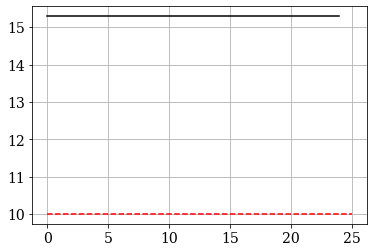

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size']= 14

plt.figure(figsize=(6, 4))
plt.plot(history, 'k-')
plt.hlines(mu, xmin=0, xmax=n_trials, linestyle='dashed', color='red')
plt.grid()
plt.show()

**(결과물)** 랜덤 시드 또한 실험 인자가 된다.

11.425521572915157


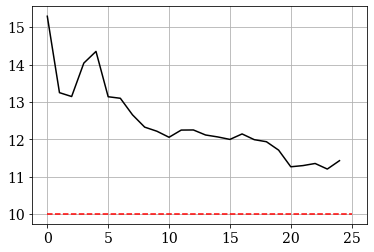

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

# 실험 인자
seed = 0
mu = 10
std = 3
n_trials = 25

# 실험 알고리즘
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    
seed_all(seed)

s = 0
count = 0
history = []
for i in range(n_trials):
    x = np.random.normal(mu, std)
    
    s = s + x
    count = count + 1
    history.append(s / count)
    
print(history[-1])

plt.figure(figsize=(6, 4))
plt.plot(history, 'k-')
plt.hlines(mu, xmin=0, xmax=n_trials, linestyle='dashed', color='red')
plt.grid()
plt.show()

### 1.2 반복 실험하여 통계량 보고
- 랜덤 시드를 설정하고 실험 결과가 재현 가능해진 대학원생 이동진씨.
- 이를 악용한 이동진씨는 랜덤 시드를 계속 바꿔가며 좋은 결과를 찾아 실험 조작을 한다.
- 좋은 결과를 만드는 시드를 찾아 그 값을 논문 기록하게 되는데 ...
- (이 결과는 거의 실화를 바탕으로 합니다.)

좋은 실험 결과를 찾아 랜덤 시드를 바꾸는 행위는 절대하면 안 된다. 좋은 알고리즘은 랜덤 시드에 따라 실험 결과가 크게 달라지지 않아야 한다. 랜덤 시드를 바꿔가며 실험을 하여 실험 결과들의 평균과 분산을 보고함으로써 알고리즘의 정확도와 정밀도를 보여줄 수 있다.

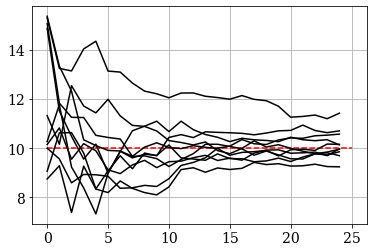

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

# 실험 인자
mu = 10
std = 3
n_trials = 25

# 실험 알고리즘
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)

plt.figure(figsize=(6, 4))
plt.hlines(mu, xmin=0, xmax=n_trials, linestyle='dashed', color='red')
plt.grid()
for seed in range(0, 10):
    seed_all(seed)

    s = 0
    count = 0
    history = []
    for i in range(n_trials):
        x = np.random.normal(mu, std)

        s = s + x
        count = count + 1
        history.append(s / count)

    plt.plot(history, 'k-')
    
plt.show()

**(꿀팁)** `pandas.DataFrame`과 `seaborn.lineplot`을 사용하면 반복 실험 결과를 더 쉽게 요약해서 보여줄 수 있다.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

# 실험 인자
mu = 10
std = 3
n_trials = 25

# 실험 알고리즘
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)

table = []
for seed in range(0, 10):
    seed_all(seed)

    s = 0
    count = 0
    for i in range(n_trials):
        x = np.random.normal(mu, std)

        s = s + x
        count = count + 1
        
        table.append([seed, i, s / count])
    
table = pd.DataFrame(table)
table.columns = ['seed', 'step', 'avg']

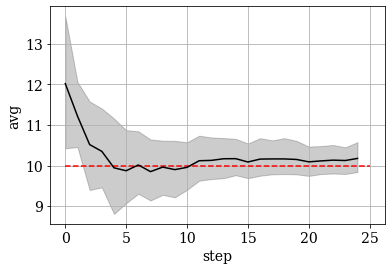

In [13]:
plt.figure(figsize=(6, 4))
plt.hlines(mu, xmin=0, xmax=n_trials, linestyle='dashed', color='red')
sns.lineplot(x='step', y='avg', data=table, color='black')  #
plt.grid()
plt.show()

## 2. 모듈화
주피터 노트북은 코드 결과를 바로 바로 볼 수 있다는 점에서 정말 좋다. 너무 좋아서 계속 코딩하다 보면 주피터 노트북 길이가 굉장히 길어지게 된다. 이번 장에서는 모듈화를 하여 짧고 재활용 가능하며 수정 및 관리가 용이한 모듈화 대해서 알아볼 것이다.

<br>

지금까지 실험 코드와 시각화 코드를 복사 붙여넣기하여 사용했다. 가장 마지막 코드 기준으로 실험 코드는 34줄이며, 시각화 코드는 4줄이다. 라이브러리를 잘 사용하면 한 줄만으로도 내가 원하는 결과를 볼 수 있다. `honeytips` 라이브러리에 있는 `plot` 함수를 사용해보자.

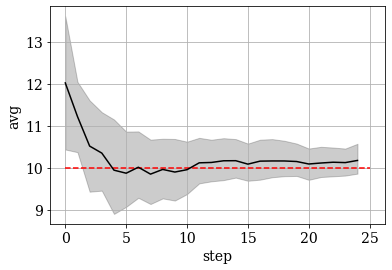

In [14]:
from honeytips.plot import lineplot

lineplot(table)

여러분들은 `honeytips` 라이브러리가 없어서 설치를 해줘야 할 것이다. 다음 코드셀에 다음과 같이 입력하여 `honeytips` 라이브러리를 설치해주자.

~~~python
!pip install honeytips
~~~

In [15]:
!pip install honeytips

ERROR: Could not find a version that satisfies the requirement honeytips (from versions: none)
ERROR: No matching distribution found for honeytips


없다. 라이브러리가 없다. 그럼 대학원생 이동진씨가 사용한 `honeytips` 라이브러리는 무엇인가?<br>

~~~python
from honeytips.plot import lineplot
~~~

구문은 `honeytips` 폴더 안에 있는 `plot.py` 파일에 있는 `lineplot` 함수를 의미한다. 실험 안밖에서 자주 사용하는 코드들은 함수로 만들어놓고 `*.py` 파일에 저장해놓고 두고두고 사용하자.

<br>

**(참고)** `*.py`의 장점
- 재활용성: `seed_all` 함수와 같이 모든 프로젝트에서 사용되는 코드는 함수로 짜놓으면 평생 가져다 사용할 수 있다.
- 관리용이성: `*.py`에서 함수를 수정하면, 해당 함수를 가져다 쓰는 모든 주피터 노트북에도 적용된다. 뿐만 아니라 git과 함께 사용하면 내가 언제 이 파일은 어떻게 수정했는지 추적해놓고 볼 수 있다. 
    - **(예시)** 
    <img src='./figure1.jpg'>

### 2.1 클래스 만들기
코딩을 처음 입문했다면 클래스가 어렵게만 느껴질 것이다. 클래스를 어렵게 생각하지 말고, 데이터와 함수를 동시에 저장할 수 있는 공간이라고 생각하자. 우리의 실험에서 데이터는 mu, std, n_trials 등이 될 것이다. 함수는 실험을 돌리는 함수나 시각화를 해주는 함수가 있을 것이다. 이때 데이터를 속성 (attribute)라고 부르고 함수를 메서드 (method)라고 부른다.

In [16]:
class Experiment:
    def __init__(self, mu, std, n_trials):
        self.mu = mu
        self.std = std
        self.n_trials = n_trials
        
    def run(self, seed):
        np.random.seed(seed)
        
        s = 0
        count = 0
        history = []
        for i in range(self.n_trials):
            x = np.random.normal(self.mu, self.std)

            s = s + x
            count = count + 1

            history.append(s / count)
            
        self.history = history
    
    def visualize(self):
        plt.figure(figsize=(6, 4))
        plt.plot(self.history, 'k-')
        plt.hlines(self.mu, xmin=0, xmax=self.n_trials, linestyle='dashed', color='red')
        plt.grid()
        plt.show()

In [17]:
mu = 10
std = 3
n_trials = 25

exp = Experiment(mu, std, n_trials)
exp.run(seed=0)

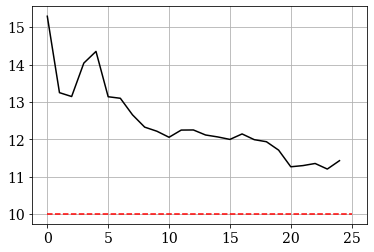

In [18]:
exp.visualize()

## 3. 효율적인 실험 로깅 - Weight and Bias (WanDB)
우리의 예제 실험의 경우 데이터를 하나 뽑고 표본 평균을 구하는 과정이 굉장히 짧다. 실험 한번에 소요되는 시간도 엄청 짧은 편이다. 하지만 대부분의 여러분들은 앞으로 실험을 시작하고 종료하기까지 엄청난 시간이 걸리는 실험을 많이 마주할 것이다.

<br>

소요 시간이 긴 실험에서 가장 답답한 부분은 내 프로그램이 잘 돌아가고 있는지. 성능은 올라가고 있는지 중간에 확인할 방법이 없다는 것이다. 로깅 (loggig)이란 실험 중간 중간 결과물을 기록하여 프로그램 밖 파일에 저장해주는 것을 의미한다. 가장 간단한 로깅은 그냥 `print`문을 사용해서 중간 산출물을 계속 출력해주는 것이다. <br>

우리 예제의 경우, history 리스트 안에 표본 평균을 저장해주는 것으로는 프로그램이 종료된 후에야 결과를 확인할 수 있다. 중간 표본평균을 출력해줘서 중간 수렴 정도를 알 수 있다.



In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

# 실험 인자
seed = 0
mu = 10
std = 3
n_trials = 25

# 실험 알고리즘
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    
seed_all(seed)

s = 0
count = 0
history = []
for i in range(n_trials):
    x = np.random.normal(mu, std)
    
    s = s + x
    count = count + 1
    history.append(s / count)
    print(s / count)


15.292157037902992
13.246314331502331
13.142947538440628
14.037880553231563
14.350839236675231
13.13706042395782
13.0960896851891
12.652319521428826
12.323211068449993
12.214069512186505
12.0520750759407
12.244637196353052
12.247596887052122
12.113127470082576
12.06102495195949
11.994774828844697
12.141096145940468
11.98795331609392
11.932755936560172
11.708003778836904
11.261957434725517
11.293725541616224
11.35022915270154
11.201198977121505
11.425521572915157


이 방법은 간단하지만, 여러 개의 값을 보기 어렵기도 하고 프로그램 실행창 더러워진다는 단점이 있다. 다른 방법은 프로그램 밖에 텍스트 파일을 만들어서 로깅하는 것이다.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

# 실험 인자
seed = 0
mu = 10
std = 3
n_trials = 25

# 실험 알고리즘
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    
seed_all(seed)

s = 0
count = 0
history = []

f = open('./log.txt', 'w')
for i in range(n_trials):
    x = np.random.normal(mu, std)
    
    s = s + x
    count = count + 1
    history.append(s / count)
    
    f.write(f'{i}\t{s / s+x}\n')
f.close()

[Weight and Bias](https://wandb.ai/home)는 무료 실험 로깅 서비스이며 회원 가입만 하면 literally 미친 로깅 서비스를 경험할 수 있다.


In [21]:
import wandb
import numpy as np

# 실험 인자
seed = 0
mu = 10
std = 3
n_trials = 25

# 실험 알고리즘
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    
seed_all(seed)
wandb.init(project='tips', name=str(seed), config={'seed': seed, 'mu': mu, 'std': std, 'n_trials': n_trials})

s = 0
count = 0
history = []
for i in range(n_trials):
    x = np.random.normal(mu, std)
    
    s = s + x
    count = count + 1
    history.append(s / count)
    
    wandb.log({'Step': i, 'Sample Mean': s / count})
    
wandb.finish()

wandb: Currently logged in as: dongjinlee. Use `wandb login --relogin` to force relogin


Sample Mean,█▄▄▆▆▄▄▃▃▃▂▃▃▃▂▂▃▂▂▂▁▁▁▁▁
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,11.42552
Step,24


[Weight and Bias](https://wandb.ai/home)의 literally 미친 기능은 반복 실험, 비교 실험에 있다.


In [22]:
import wandb
import numpy as np


# 실험 인자
mu = 10
std = 3
n_trials = 25

# 실험 알고리즘
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)

for seed in range(10):
    seed_all(seed)
    wandb.init(project='tips2', group='Group1', name=str(seed), config={'seed': seed, 'mu': mu, 'std': std, 'n_trials': n_trials})

    s = 0
    count = 0
    history = []
    for i in range(n_trials):
        x = np.random.normal(mu, std)

        s = s + x
        count = count + 1
        history.append(s / count)

        wandb.log({'Step': i, 'Sample Mean': s / count})

    wandb.finish()

Sample Mean,█▄▄▆▆▄▄▃▃▃▂▃▃▃▂▂▃▂▂▂▁▁▁▁▁
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,11.42552
Step,24


Sample Mean,█▄▃▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,9.96181
Step,24


Sample Mean,▆█▁▇▄▄▅▄▄▃▅▇▇▇▇▇▇███▇██▇▇
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,9.24498
Step,24


Sample Mean,█▆▅▂▂▂▂▁▁▁▁▁▂▂▂▂▂▂▂▂▁▁▂▂▂
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,9.70001
Step,24


Sample Mean,▅█▃▆▄▂▁▂▃▂▃▃▃▄▃▃▃▄▅▅▄▄▄▄▅
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,9.97822
Step,24


Sample Mean,▅▂█▆▅▇▅▄▄▃▂▂▂▂▁▁▂▂▂▂▂▁▁▁▁
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,9.85924
Step,24


Sample Mean,▃▇▇▅▁▃▅▃▅▅▇▇▇▇▇▇▇▇▇▇▇█▇▇▇
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,10.70774
Step,24


Sample Mean,█▄▃▃▂▂▂▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▂▂
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,10.15835
Step,24


Sample Mean,▆█▄▃▁▄▅▆▇▇▆▇▆▆▆▆▆▆▆▆▆▆▆▆▅
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,10.13679
Step,24


Sample Mean,▆▅▂▃▃▃▁▁▁▁▂▄▄▅▆▆▇▇▇▇█▇███
Step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Sample Mean,10.57417
Step,24
